# Loan Approval Prediction

## Project Overview
This project builds a binary classification model to predict loan approval outcomes using the Kaggle Loan Approval Prediction Dataset. It includes data preprocessing, handling class imbalance with SMOTE, training Logistic Regression and Decision Tree models, and evaluating performance with precision, recall, and F1-score. A visualization of the target variable distribution is also included.

## Requirements
- Python 3.12+
- Libraries: `numpy`, `pandas`, `matplotlib`, `scikit-learn`, `imblearn`
- Dataset: [Loan Approval Prediction Dataset](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset)

Install dependencies:
```bash
pip install numpy pandas matplotlib scikit-learn imblearn
```

## Dataset
The dataset contains features like `loan_id`, `no_of_dependents`, `education`, `self_employed`, `income_annum`, `loan_amount`, `loan_term`, `cibil_score`, and the target `loan_status` (encoded as 0 for 'Rejected' and 1 for 'Approved').

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

## 1. Load and Inspect Data
Load the dataset and check its structure.

In [2]:
# Load dataset
try:
    df = pd.read_csv('data/raw_data/loan_approval_dataset.csv')
except FileNotFoundError:
    raise FileNotFoundError("Dataset not found. Ensure 'loan_approval_dataset.csv' is in 'data/raw_data/'.")

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Display first few rows
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## 2. Visualize Target Variable Distribution
Plot the distribution of the target variable `loan_status` to understand class imbalance.

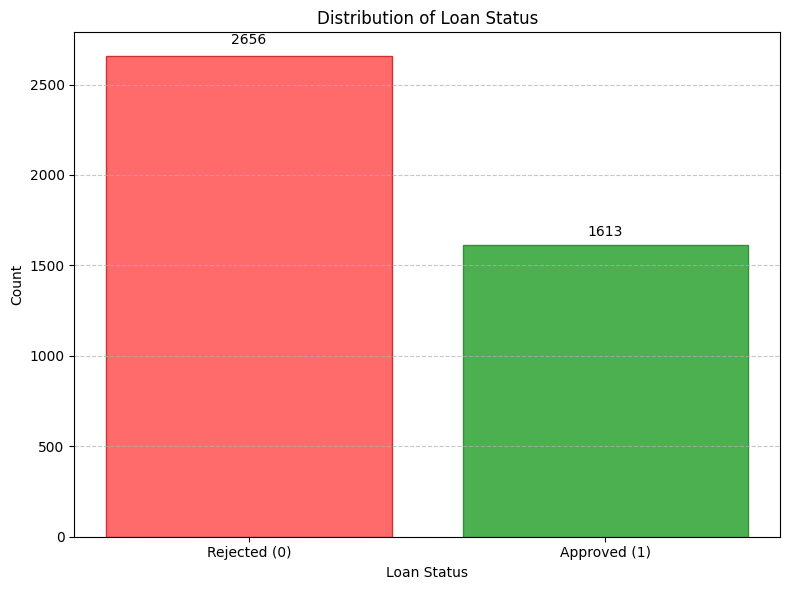

Unique values in 'loan_status': [' Approved' ' Rejected']


In [3]:
# Define target column
target_column = 'loan_status'

# Verify target column exists
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found. Available columns: {df.columns.tolist()}")

# Calculate distribution
status_counts = df[target_column].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(status_counts.index, status_counts.values, color=['#FF6B6B', '#4CAF50'], 
               edgecolor=['#D32F2F', '#388E3C'], linewidth=1)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks(status_counts.index, ['Rejected (0)', 'Approved (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, int(yval), 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print unique values
print(f"Unique values in '{target_column}': {df[target_column].unique()}")

## 3. Data Preprocessing
Handle missing values, encode categorical variables, and scale features.

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Encode categorical variables
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


## 4. Handle Class Imbalance with SMOTE
Apply SMOTE to balance the training data.

In [5]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution after SMOTE:
loan_status
0    2120
1    2120
Name: count, dtype: int64


## 5. Train and Evaluate Models
Train Logistic Regression and Decision Tree models, then evaluate their performance.

In [6]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)
lr_pred = lr_model.predict(X_test_scaled)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)
dt_pred = dt_model.predict(X_test_scaled)

# Evaluate models
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_pred, target_names=['Rejected', 'Approved']))

print("\nDecision Tree Performance:")
print(classification_report(y_test, dt_pred, target_names=['Rejected', 'Approved']))

Logistic Regression Performance:
              precision    recall  f1-score   support

    Rejected       0.95      0.90      0.93       536
    Approved       0.85      0.92      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854


Decision Tree Performance:
              precision    recall  f1-score   support

    Rejected       0.97      0.98      0.97       536
    Approved       0.96      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



## 6. Results Interpretation
The Decision Tree model outperforms Logistic Regression, achieving higher precision, recall, and F1-score (approximately 0.97 vs. 0.91 overall accuracy). This suggests Decision Tree is better suited for this dataset, likely due to its ability to capture non-linear relationships.